## GENDER VIOLENCE DATA CLEANING

### Pseudocodes
- import the necessary libraries
- import dataset
- check through for abnormalities and handle them all
- check for correlation
- print out your cleaned dataset
- train-test split
- build a machine learning model
- evaluate the performance

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
#reading the dataset into the notebook
df = pd.read_csv(r'C:\Users\pc\Desktop\pythonclass\Aptech\DataAnalytics\DataSets\gender_violence.csv')

In [4]:
df.head()

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration_of_Violence,Impact_score
0,A1234567,female,20.0,high_school,low,unemployed,single,0.0,1,urban,physical,once_a_month,severe,2.5,8.7
1,B9876543,male,30.0,college,high,employed,married,1.0,2,suburban,verbal,once_a_year,moderate,1.8,5.2
2,C2345678,female,40.0,graduate_school,high,self-employed,NaN,2.0,3,rural,sexual,once_a_week,mild,3.2,3.9
3,D8765432,female,NaN,NaN,high,unemployed,single,0.0,1,urban,physical,once_a_week,severe,1.5,7.3
4,E3456789,male,31.0,college,NaN,employed,married,NaN,2,suburban,verbal,once_a_month,moderate,2.9,6.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   gender                242 non-null    object 
 2   age                   198 non-null    float64
 3   education             198 non-null    object 
 4   income                232 non-null    object 
 5   employment            234 non-null    object 
 6   marital_status        232 non-null    object 
 7   number_of_children    235 non-null    float64
 8   household_size        237 non-null    object 
 9   location              241 non-null    object 
 10  violence_type         242 non-null    object 
 11  violence_frequency    242 non-null    object 
 12  violence_severity     242 non-null    object 
 13  Duration_of_Violence  242 non-null    float64
 14  Impact_score          241 non-null    float64
dtypes: float64(4), object(1

In [6]:
df.describe()

,age,number_of_children,Duration_of_Violence,Impact_score
count,198.000000,235.000000,242.000000,241.000000
mean,32.116162,0.957447,2.308264,6.700415
std,4.603204,0.825798,0.519350,6.760119
min,20.000000,0.000000,-2.200000,3.200000
25%,30.000000,0.000000,2.000000,4.500000
50%,32.000000,1.000000,2.300000,5.900000
75%,36.000000,2.000000,2.675000,7.800000
max,41.000000,3.000000,3.700000,94.000000


## Handling Missing Values

In [8]:
#MISSING VALUES FOR NUMERIC DATA
df.age = df.age.fillna(df.age.mean())
df.number_of_children = df.number_of_children.fillna(df.number_of_children.mean())
# df.Impact_score = df.Impact_score.fillna(df.Impact_score.mean())

In [9]:
#MISSING VALUES FOR CATEGORICAL DATA
df.education = df.education.fillna('None')
df.income = df.income.fillna(df.income.mode()[0])
df.employment = df.employment.fillna('unemployed')
df.marital_status = df.marital_status.fillna(df.marital_status.mode()[0])
df.household_size = df.household_size.fillna(df.household_size.mode()[0])
df.location = df.location.fillna(df.location.mode()[0])

In [10]:
#shifting the row that has the columns shifted
# Shift from column 8 to the end in row 47 to the right
df.iloc[47, 8:] = df.iloc[47, 8:].shift()
print(df.iloc[47])
df.iloc[47].info()

id                             V6547892
gender                             male
age                                38.0
education               graduate_school
income                             high
employment                self-employed
marital_status                   single
number_of_children                  3.0
household_size                     None
location                          urban
violence_type                    verbal
violence_frequency         once_a_month
violence_severity                  mild
Duration_of_Violence                2.5
Impact_score                        3.7
Name: 47, dtype: object
<class 'pandas.core.series.Series'>
Index: 15 entries, id to Impact_score
Series name: 47
Non-Null Count  Dtype 
--------------  ----- 
14 non-null     object
dtypes: object(1)
memory usage: 796.0+ bytes


C:\Users\pc\AppData\Local\Temp\ipykernel_14116\3174217201.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[47, 8:] = df.iloc[47, 8:].shift()


In [11]:
#changing a particular value in a row 47 and column duration_of_violence from object to float
# df.at[47,'Duration_of_Violence'] = float(df.at[47,'Duration_of_Violence'])
# df.iloc[47].info()

#changing the entire column to float64
df['Duration_of_Violence'] = df['Duration_of_Violence'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   gender                242 non-null    object 
 2   age                   242 non-null    float64
 3   education             242 non-null    object 
 4   income                242 non-null    object 
 5   employment            242 non-null    object 
 6   marital_status        242 non-null    object 
 7   number_of_children    242 non-null    float64
 8   household_size        241 non-null    object 
 9   location              242 non-null    object 
 10  violence_type         242 non-null    object 
 11  violence_frequency    242 non-null    object 
 12  violence_severity     242 non-null    object 
 13  Duration_of_Violence  242 non-null    float64
 14  Impact_score          242 non-null    float64
dtypes: float64(4), object(1

In [12]:
df.household_size = df.household_size.fillna(df.household_size.mode()[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   gender                242 non-null    object 
 2   age                   242 non-null    float64
 3   education             242 non-null    object 
 4   income                242 non-null    object 
 5   employment            242 non-null    object 
 6   marital_status        242 non-null    object 
 7   number_of_children    242 non-null    float64
 8   household_size        242 non-null    object 
 9   location              242 non-null    object 
 10  violence_type         242 non-null    object 
 11  violence_frequency    242 non-null    object 
 12  violence_severity     242 non-null    object 
 13  Duration_of_Violence  242 non-null    float64
 14  Impact_score          242 non-null    float64
dtypes: float64(4), object(1

In [14]:
df.education.value_counts().index

Index(['high_school', 'college', 'graduate_school', 'None'], dtype='object', name='education')

In [15]:
df.income.value_counts()

income
low     133
high    109
Name: count, dtype: int64

In [16]:
df.employment.value_counts()

employment
unemployed       85
employed         83
self-employed    74
Name: count, dtype: int64

In [17]:
df.marital_status.value_counts()

marital_status
single      92
married     79
divorced    71
Name: count, dtype: int64

## Handling Outliers

Upper Percentile


In [20]:
df.Impact_score.describe()

count    242.000000
mean       6.688017
std        6.748836
min        3.200000
25%        4.425000
50%        5.900000
75%        7.800000
max       94.000000
Name: Impact_score, dtype: float64

In [21]:
up = np.percentile(df.Impact_score,[99])[0]
print(up)

9.759


In [22]:
df[df.Impact_score > up]

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration_of_Violence,Impact_score
143,N9632587,female,34.0,college,low,unemployed,divorced,2.0,3,suburban,physical,once_a_year,severe,2.2,9.8
197,P2583694,female,38.0,graduate_school,low,unemployed,divorced,2.0,3,suburban,verbal,once_a_year,moderate,2.4,55.4
203,V7418529,female,34.0,graduate_school,low,unemployed,divorced,2.0,3,suburban,verbal,once_a_year,mild,-2.2,94.0


In [23]:
df.loc[df.Impact_score > 1.01*up, "Impact_score"] = 1.01*up

In [24]:
df.Impact_score.describe()

count    242.000000
mean       6.152121
std        1.965593
min        3.200000
25%        4.425000
50%        5.900000
75%        7.800000
max        9.856590
Name: Impact_score, dtype: float64

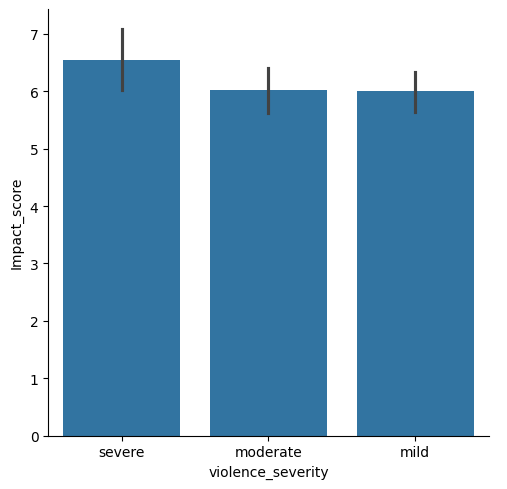

In [25]:
#creating a bar plot of severity against impact score just to see
sb.catplot(data=df, x="violence_severity", y="Impact_score", kind="bar")

Lower Percentile

In [27]:
df.Duration_of_Violence.describe()

count    242.000000
mean       2.303306
std        0.511678
min       -2.200000
25%        2.000000
50%        2.300000
75%        2.600000
max        3.200000
Name: Duration_of_Violence, dtype: float64

In [28]:
lp = np.percentile(df.Duration_of_Violence,[99])[0]
print(lp)

3.0


In [29]:
df[df.Duration_of_Violence < lp]

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration_of_Violence,Impact_score
0,A1234567,female,20.000000,high_school,low,unemployed,single,0.000000,1,urban,physical,once_a_month,severe,2.5,8.7
1,B9876543,male,30.000000,college,high,employed,married,1.000000,2,suburban,verbal,once_a_year,moderate,1.8,5.2
3,D8765432,female,32.116162,None,high,unemployed,single,0.000000,1,urban,physical,once_a_week,severe,1.5,7.3
4,E3456789,male,31.000000,college,low,employed,married,0.957447,2,suburban,verbal,once_a_month,moderate,2.9,6.1
5,F7654321,female,41.000000,graduate_school,high,self-employed,divorced,2.000000,1,rural,sexual,once_a_year,mild,2.1,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,D7418529,female,38.000000,high_school,low,employed,single,0.000000,1,rural,verbal,once_a_week,severe,2.4,4.8
238,E9632587,male,34.000000,college,high,unemployed,divorced,2.000000,3,suburban,verbal,once_a_month,mild,2.7,7.1
239,F8529631,female,30.000000,high_school,low,employed,single,0.000000,1,rural,verbal,once_a_year,moderate,2.0,9.6
240,G3698521,male,36.000000,graduate_school,low,self-employed,married,1.000000,2,urban,verbal,once_a_week,mild,2.3,5.2


In [30]:
df.loc[df.Duration_of_Violence < 0.5*lp, "Duration_of_Violence"] = 0.5*lp

In [31]:
df.Duration_of_Violence.describe()

count    242.000000
mean       2.325207
std        0.399773
min        1.500000
25%        2.000000
50%        2.300000
75%        2.600000
max        3.200000
Name: Duration_of_Violence, dtype: float64

In [32]:
df.describe()

,age,number_of_children,Duration_of_Violence,Impact_score
count,242.000000,242.000000,242.000000,242.000000
mean,32.116162,0.957447,2.325207,6.152121
std,4.161834,0.813717,0.399773,1.965593
min,20.000000,0.000000,1.500000,3.200000
25%,30.000000,0.000000,2.000000,4.425000
50%,32.116162,1.000000,2.300000,5.900000
75%,35.000000,2.000000,2.600000,7.800000
max,41.000000,3.000000,3.200000,9.856590


## Dropping non-useful columns

In [101]:
#inplace modifies the original dataframe
df.drop('id',axis=1,inplace=True)

## Assessing and Addressing Skewness

using the pandas function df.skew to check for columns, and perhaps rows, that are skewed

df.skew() checks for skewness in numeric columns so i have to filter the numeric from the categorical using df.select_dtypes() function

In [38]:
numeric_columns = df.select_dtypes(include=['float64','int64'])
print(numeric_columns)

# Skewness over numeric columns
skewness_over_columns = numeric_columns.skew(axis=0, skipna=True)
# Skewness over rows
skewness_over_rows = numeric_columns.skew(axis=1, skipna=True)  
print(skewness_over_columns)
print(skewness_over_rows)

           age  number_of_children  Duration_of_Violence  Impact_score
0    20.000000            0.000000                   2.5           8.7
1    30.000000            1.000000                   1.8           5.2
2    40.000000            2.000000                   3.2           3.9
3    32.116162            0.000000                   1.5           7.3
4    31.000000            0.957447                   2.9           6.1
..         ...                 ...                   ...           ...
237  38.000000            0.000000                   2.4           4.8
238  34.000000            2.000000                   2.7           7.1
239  30.000000            0.000000                   2.0           9.6
240  36.000000            1.000000                   2.3           5.2
241  32.000000            2.000000                   2.6           3.5

[242 rows x 4 columns]
age                    -0.550806
number_of_children      0.127271
Duration_of_Violence   -0.230606
Impact_score            0

### Check Skewness Values:


Use the Pandas dataframe.skew() method to calculate skewness for each column

* If the skewness value is close to 0, the distribution is approximately symmetric.
* If the skewness is positive (greater than 0), the distribution is right-skewed (tail on the right).
* If the skewness is negative (less than 0), the distribution is left-skewed (tail on the left).eristics.


### Interpret Skewness:
* Generally, skewness values between -0.5 and 0.5 are considered acceptable for most analyses.
* If skewness is beyond this range, consider applying transformations to make the data more symmetric.

### Apply Transformations:
Common transformations include log transformation, Box-Cox transformation, or exponential transformation.
Choose the appropriate transformation based on the data characteristics.

In [41]:
#Applying transformation on Impact_score with skew value of 4.321675 (positive skewness)
#using log transformation because the data has a positive skew
#using natural logarithm directly on the column values because the column is strictly positive (>0)
df.Impact_score = np.log(df.Impact_score)

In [42]:
#checking skewness in Impact)score post-treatment
skew_check = df.Impact_score.skew()
print(f'New skewness value of Impact_score is {skew_check}')

New skewness value of Impact_score is -0.16763047260112907


In [43]:
df.Impact_score.describe()

count    242.000000
mean       1.763323
std        0.332581
min        1.163151
25%        1.487223
50%        1.774952
75%        2.054124
max        2.288140
Name: Impact_score, dtype: float64

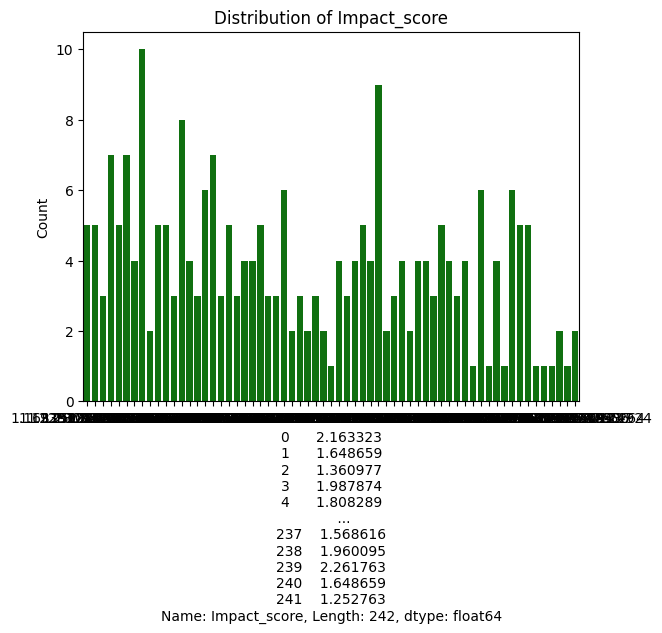

In [44]:
#plotting a histogram to check for treated skewness
import matplotlib.pyplot as plt
sb.countplot(data=df,x=df.Impact_score,color='green')
plt.xlabel(df.Impact_score)
plt.ylabel('Count')
plt.title('Distribution of Impact_score')
plt.show()

## Handling Categorical Variables
I'll be using **LabelEncoder** because i do not want to specify an order for the data in the variables as it doesn't come with a useful inherent order

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   gender                242 non-null    object 
 2   age                   242 non-null    float64
 3   education             242 non-null    object 
 4   income                242 non-null    object 
 5   employment            242 non-null    object 
 6   marital_status        242 non-null    object 
 7   number_of_children    242 non-null    float64
 8   household_size        242 non-null    object 
 9   location              242 non-null    object 
 10  violence_type         242 non-null    object 
 11  violence_frequency    242 non-null    object 
 12  violence_severity     242 non-null    object 
 13  Duration_of_Violence  242 non-null    float64
 14  Impact_score          242 non-null    float64
dtypes: float64(4), object(1

In [47]:
from sklearn.preprocessing import LabelEncoder
#creating new columns of the variables to add to the datasets after encoding
encoder = LabelEncoder()

df['gender_'] = encoder.fit_transform(df.gender)
df['education_'] = encoder.fit_transform(df.education)
df['income_'] = encoder.fit_transform(df.income)
df['employment_'] = encoder.fit_transform(df.employment)
df['marital_status_'] = encoder.fit_transform(df.marital_status)
df['household_size_'] = encoder.fit_transform(df.household_size)
# df['location_'] = encoder.fit_transform(df.location)
# df['violence_type_'] = encoder.fit_transform(df.violence_type)
# df['violence_frequency_'] = encoder.fit_transform(df.violence_frequency)
# df['violence_severity_'] = encoder.fit_transform(df.violence_severity)

In [48]:
df.violence_frequency.unique().tolist()

['once_a_month', 'once_a_year', 'once_a_week']

In [49]:
#doing an ordinal encoding for a few columns: assigning an order to them
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# order_type = [['sexual','physical','verbal']]
# order_frequency = [['once_a_week','once_a_month','once_a_year']]
# order_severity = [['severe','moderate','mild']]
# order_location = [['rural','suburban','urban']]

order_type = [['sexual','physical','verbal']] 
encoder_type = OrdinalEncoder(categories=order_type)
encoded_type = encoder_type.fit_transform(df[['violence_type']])
df['violence_type_'] = encoded_type

order_frequency = [['once_a_week','once_a_month','once_a_year']]
encoder_frequency = OrdinalEncoder(categories=order_frequency)
encoded_frequency = encoder_frequency.fit_transform(df[['violence_frequency']])
df['violence_frequency_'] = encoded_frequency

order_severity = [['severe','moderate','mild']]
encoder_severity = OrdinalEncoder(categories=order_severity)
encoded_severity = encoder_severity.fit_transform(df[['violence_severity']])
df['violence_severity_'] = encoded_severity

order_location = [['rural','suburban','urban']]
encoder_location = OrdinalEncoder(categories=order_location)
encoded_location = encoder_location.fit_transform(df[['location']])
df['location_'] = encoded_location

In [50]:
df.head()

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,...,gender_,education_,income_,employment_,marital_status_,household_size_,violence_type_,violence_frequency_,violence_severity_,location_
0,A1234567,female,20.000000,high_school,low,unemployed,single,0.000000,1,urban,...,0,3,1,2,2,0,1.0,1.0,0.0,2.0
1,B9876543,male,30.000000,college,high,employed,married,1.000000,2,suburban,...,1,1,0,0,1,1,2.0,2.0,1.0,1.0
2,C2345678,female,40.000000,graduate_school,high,self-employed,single,2.000000,3,rural,...,0,2,0,1,2,2,0.0,0.0,2.0,0.0
3,D8765432,female,32.116162,None,high,unemployed,single,0.000000,1,urban,...,0,0,0,2,2,0,1.0,0.0,0.0,2.0
4,E3456789,male,31.000000,college,low,employed,married,0.957447,2,suburban,...,1,1,1,0,1,1,2.0,1.0,1.0,1.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   gender                242 non-null    object 
 2   age                   242 non-null    float64
 3   education             242 non-null    object 
 4   income                242 non-null    object 
 5   employment            242 non-null    object 
 6   marital_status        242 non-null    object 
 7   number_of_children    242 non-null    float64
 8   household_size        242 non-null    object 
 9   location              242 non-null    object 
 10  violence_type         242 non-null    object 
 11  violence_frequency    242 non-null    object 
 12  violence_severity     242 non-null    object 
 13  Duration_of_Violence  242 non-null    float64
 14  Impact_score          242 non-null    float64
 15  gender_               2

In [93]:
#dropping categorical columns after encoding
df.drop(['gender','education'],axis=1,inplace=True)
df = df.drop(columns=['income','employment','marital_status','household_size','location','violence_type','violence_frequency','violence_severity'])

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   age                   242 non-null    float64
 2   number_of_children    242 non-null    float64
 3   Duration_of_Violence  242 non-null    float64
 4   Impact_score          242 non-null    float64
 5   gender_               242 non-null    int32  
 6   education_            242 non-null    int32  
 7   income_               242 non-null    int32  
 8   employment_           242 non-null    int32  
 9   marital_status_       242 non-null    int32  
 10  household_size_       242 non-null    int32  
 11  violence_type_        242 non-null    float64
 12  violence_frequency_   242 non-null    float64
 13  violence_severity_    242 non-null    float64
 14  location_             242 non-null    float64
dtypes: float64(8), int32(6)

## Calculating Correlation to assess relationship between variables

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   242 non-null    float64
 1   number_of_children    242 non-null    float64
 2   Duration_of_Violence  242 non-null    float64
 3   Impact_score          242 non-null    float64
 4   gender_               242 non-null    int32  
 5   education_            242 non-null    int32  
 6   income_               242 non-null    int32  
 7   employment_           242 non-null    int32  
 8   marital_status_       242 non-null    int32  
 9   household_size_       242 non-null    int32  
 10  violence_type_        242 non-null    float64
 11  violence_frequency_   242 non-null    float64
 12  violence_severity_    242 non-null    float64
 13  location_             242 non-null    float64
dtypes: float64(8), int32(6)
memory usage: 20.9 KB


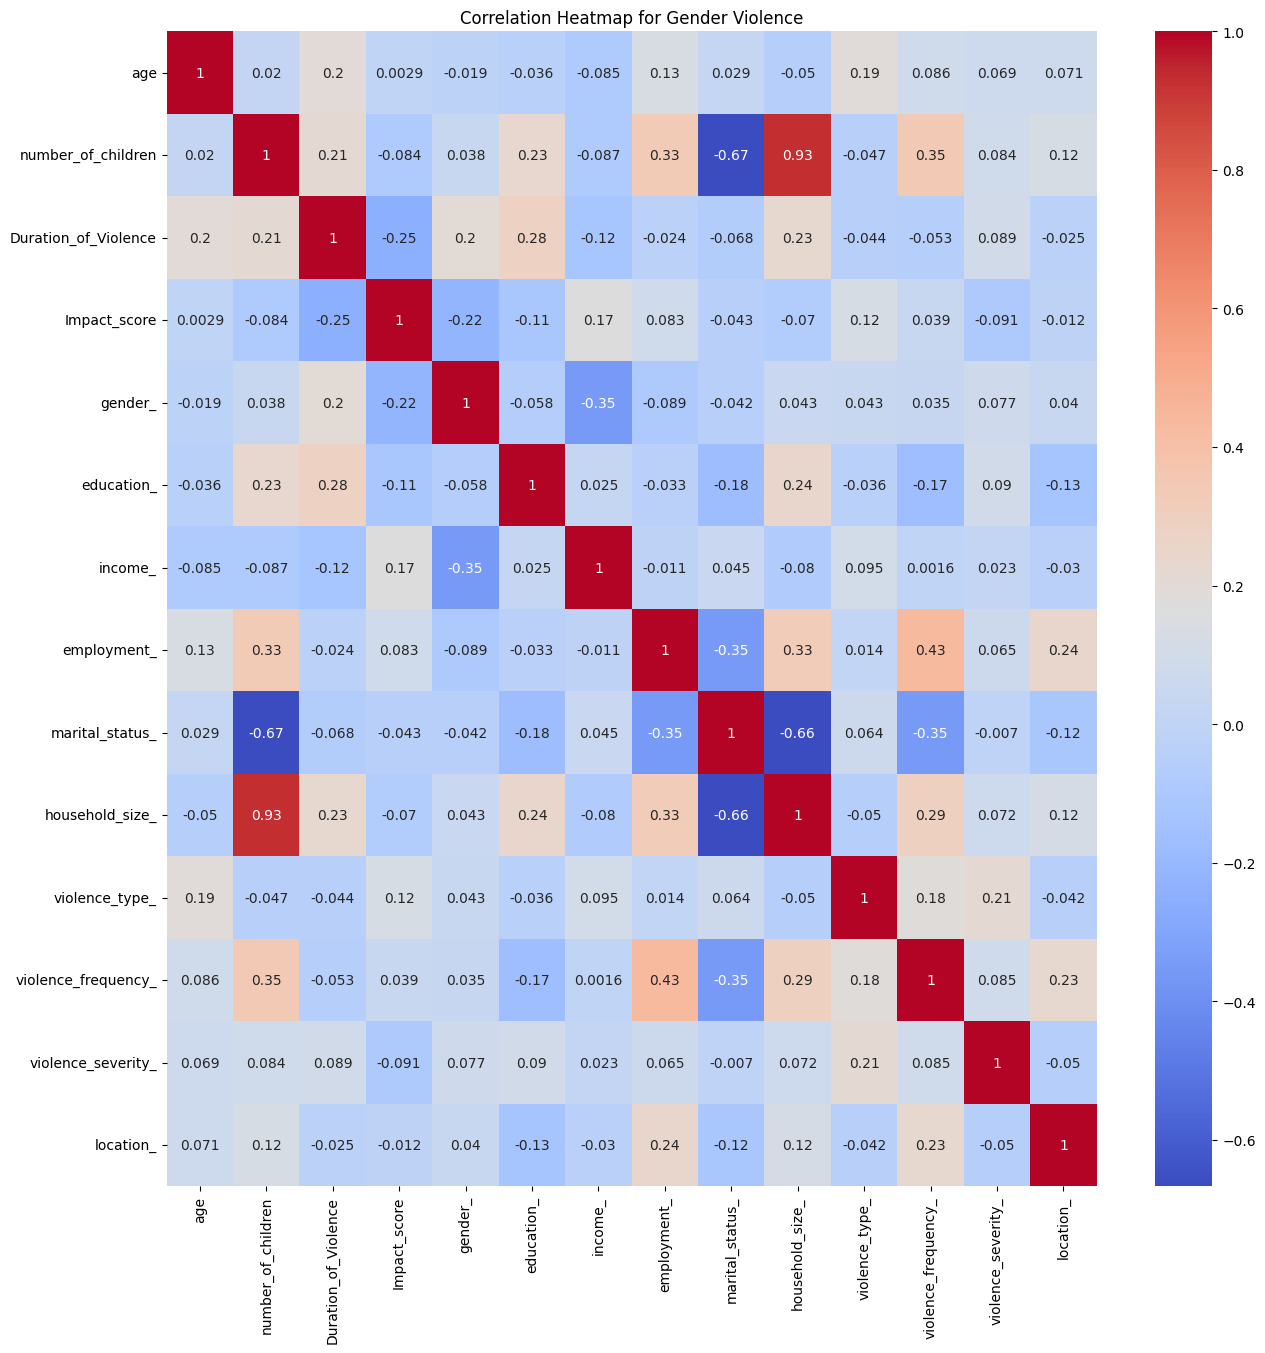

In [105]:
import matplotlib.pyplot as plt
#calcualting the correlation for the data
corr = df.corr()

#configuring map size
plt.figure(figsize=(15,15))
#plotting a heatmap to visualize correlation coefficient and relationship
sb.heatmap(corr, cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap for Gender Violence')
plt.show()

## Doing a feature selection
Number of children is correlating highly with household size. I'll remove number_of_children because the general size of a household typically includes the number of children a person has

In [107]:
df['family_size'] = (df.number_of_children + df.household_size_)/2

In [109]:
df.drop(['number_of_children','household_size_'], axis=1, inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   242 non-null    float64
 1   Duration_of_Violence  242 non-null    float64
 2   Impact_score          242 non-null    float64
 3   gender_               242 non-null    int32  
 4   education_            242 non-null    int32  
 5   income_               242 non-null    int32  
 6   employment_           242 non-null    int32  
 7   marital_status_       242 non-null    int32  
 8   violence_type_        242 non-null    float64
 9   violence_frequency_   242 non-null    float64
 10  violence_severity_    242 non-null    float64
 11  location_             242 non-null    float64
 12  family_size           242 non-null    float64
dtypes: float64(8), int32(5)
memory usage: 20.0 KB


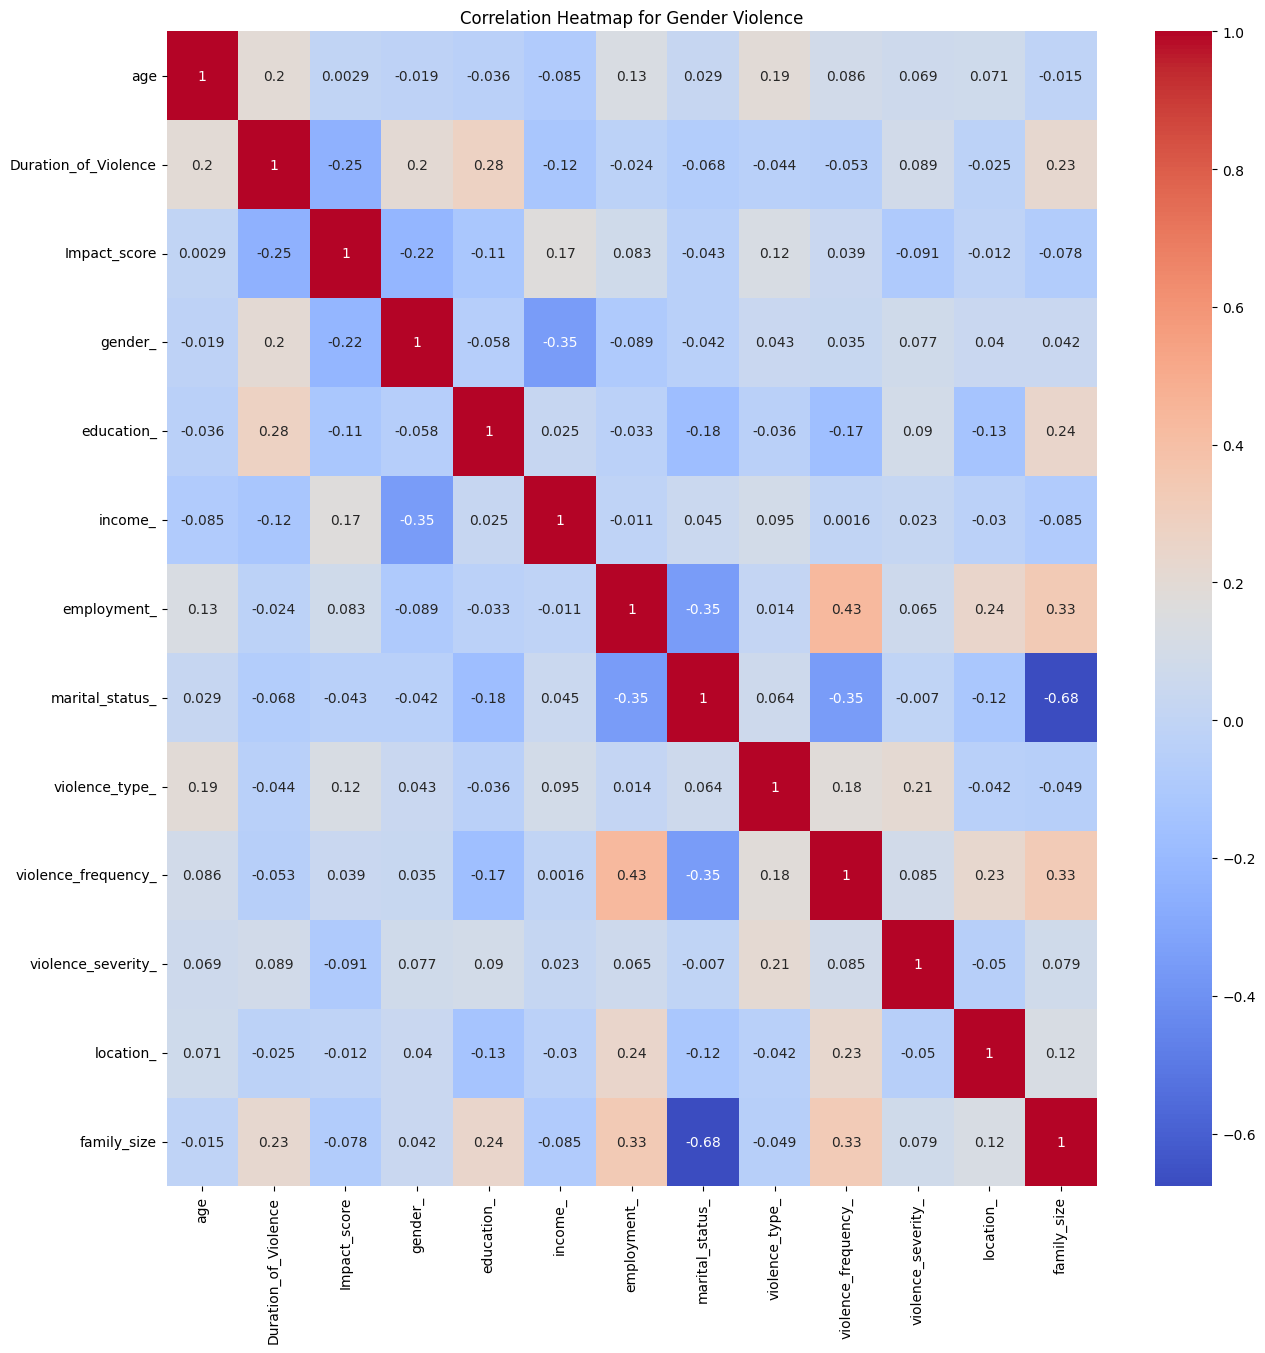

In [113]:
import matplotlib.pyplot as plt
#calcualting the correlation for the data
corr = df.corr()

#configuring map size
plt.figure(figsize=(15,15))
#plotting a heatmap to visualize correlation coefficient and relationship
sb.heatmap(corr, cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap for Gender Violence')
plt.show()

### To print a new copy of the dataset

In [115]:
df.to_csv("GenderViolenceCleaned.csv", index = False)

### Data Cleaning/Preprocessing Completed!!!

## Doing a Regression to classify the violence_severity

### Logistic Regression

In [123]:
x = df.drop('violence_severity_',axis=1)
y = df['violence_severity_']

In [129]:
from sklearn.linear_model import LogisticRegression
# Creating an instance of the Logistic Regression model
model = LogisticRegression()

# Training the model on the whole data
model.fit(x,y)

#predicting output of data
# y_pred = model.predict(x)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
#predicting output of data
y_pred = model.predict(x)
y_pred

array([0., 2., 1., 0., 1., 1., 0., 2., 2., 1., 0., 2., 0., 0., 1., 2., 2.,
       1., 2., 0., 2., 0., 0., 2., 2., 0., 2., 1., 0., 2., 2., 0., 2., 0.,
       2., 1., 2., 1., 2., 0., 1., 2., 0., 2., 2., 2., 1., 2., 1., 2., 2.,
       1., 0., 1., 1., 0., 2., 0., 2., 1., 2., 0., 1., 2., 0., 2., 0., 2.,
       2., 0., 2., 2., 1., 2., 0., 1., 0., 2., 1., 0., 2., 1., 2., 2., 0.,
       1., 2., 0., 2., 2., 1., 0., 2., 1., 0., 2., 2., 0., 2., 2., 1., 2.,
       2., 1., 2., 2., 0., 2., 1., 0., 2., 1., 0., 2., 1., 2., 2., 1., 2.,
       2., 1., 0., 2., 1., 2., 0., 2., 0., 1., 2., 1., 1., 2., 1., 2., 1.,
       0., 2., 1., 2., 2., 1., 2., 0., 1., 2., 2., 1., 0., 2., 1., 2., 0.,
       1., 2., 2., 1., 2., 2., 1., 0., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
       2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2.,
       1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2.,
       2., 1., 0., 2., 1.

In [137]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy
accuracy = accuracy_score(y, y_pred)
print("Whole Data Accuracy:", accuracy)

Whole Data Accuracy: 0.5206611570247934


## Doing a train-test split for Regression

In [140]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [142]:
from sklearn.linear_model import LogisticRegression

#creating an instance of Logistics Regression
model1 = LogisticRegression()

#training the model with training data
model.fit(x_train,y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
#making predictions on test data
y_pred_train = model.predict(x_train)

#calculating accuracy score of the predictin
accuracy = accuracy_score(y_pred_train, y_train)
print(f'Train Accuracy score is {accuracy}')

Train Accuracy score is 0.5440414507772021


In [146]:
#making prediction for test data
y_pred_test = model.predict(x_test)

#making accuracy score of the prediction
accuracy = accuracy_score(y_pred_test, y_test)
print(f'Test Accuracy is {accuracy}')

Test Accuracy is 0.3469387755102041


### Doing a Confusion Matrix

In [149]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[28  7 18]
 [ 8 23 28]
 [12 15 54]]
[[ 1  4  7]
 [ 6  5  6]
 [ 2  7 11]]


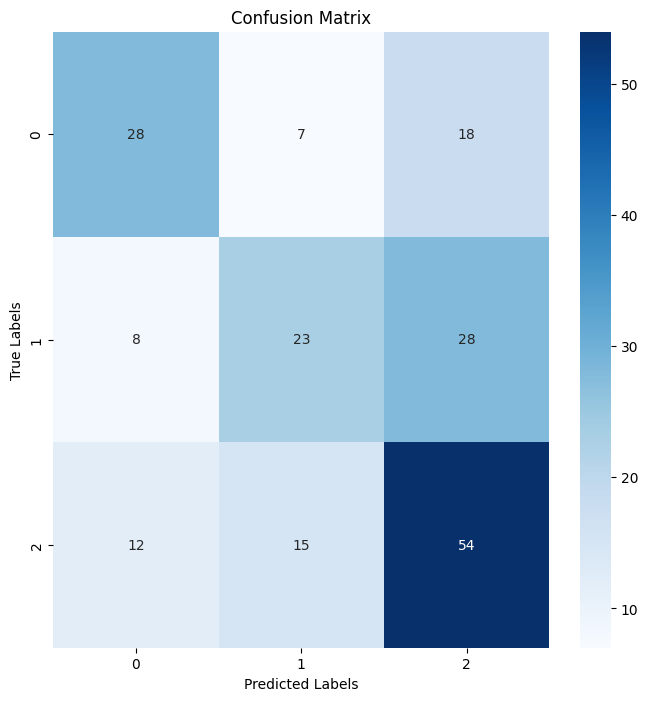

In [153]:
#plotting the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sb.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

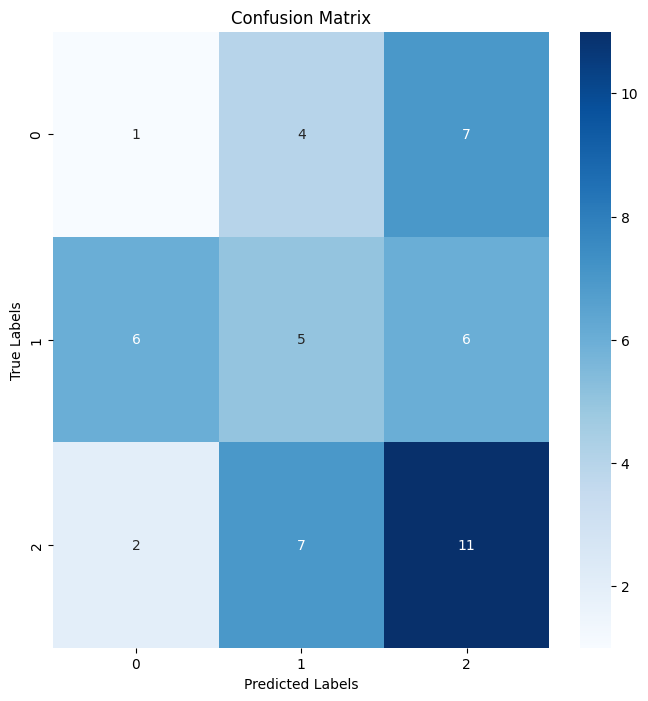

In [155]:
#plotting the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sb.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

### Trying out Ensemble Techniques
#### Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
#creating an instance of the model
tree = DecisionTreeClassifier()
#training the model with the training data
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [161]:
#making predictions on train and test output
ypred_train = tree.predict(x_train)
ypred_test = tree.predict(x_test)

In [163]:
#running accuracy on train output
accuracy = accuracy_score(ypred_train,y_train)
print(f'Accuracy of train is {accuracy}')

Accuracy of train is 1.0


In [169]:
#confusion matrix for train
cm_train = confusion_matrix(ypred_train,y_train)
cm_train

array([[53,  0,  0],
       [ 0, 59,  0],
       [ 0,  0, 81]], dtype=int64)

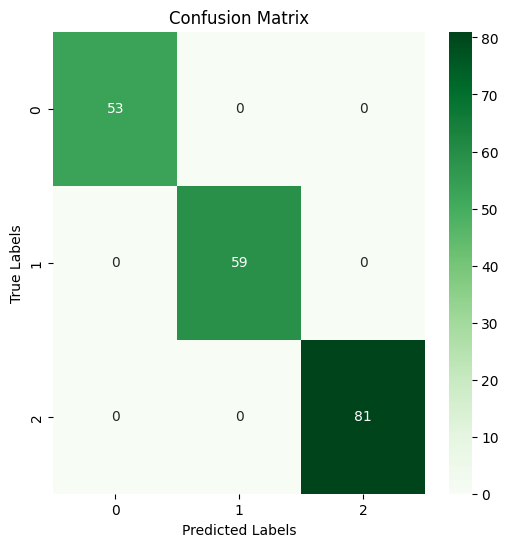

In [171]:
plt.figure(figsize=(6, 6))
sb.heatmap(cm_train, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

In [173]:
#confusion matrix for test output
cm_test = confusion_matrix(ypred_test,y_test)
cm_test

array([[ 3,  4,  2],
       [ 5,  7,  8],
       [ 4,  6, 10]], dtype=int64)

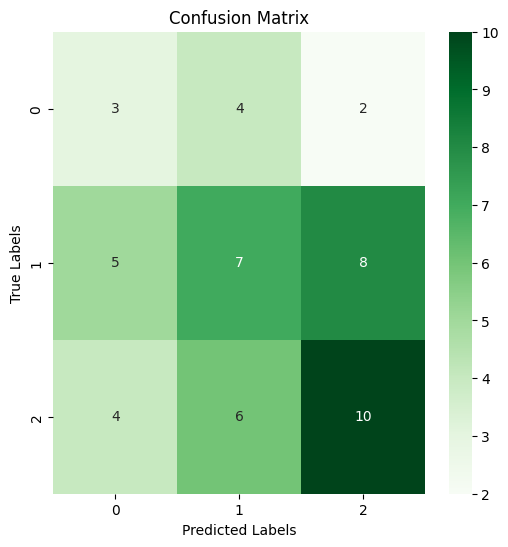

In [177]:
plt.figure(figsize=(6, 6))
sb.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

In [165]:
#running accuracy on test output
accuracy = accuracy_score(ypred_test,y_test)
print(f'Accuracy of test is {accuracy}')

Accuracy of test is 0.40816326530612246


#### Standardization

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Standardization (Z-Score Normalization)
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(x_train)
# standardized_df = pd.df(standardized_data, columns=x_train.columns[['age','number_of_children','Duration_of_Violence','Impact_score'])
# standardized_df.describe()